<a href="https://colab.research.google.com/github/AlanMarquesRocha/segmentacao_imagens_pdi/blob/master/listas_exerciicios_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Listas de Exercícios relacionadas a 1ª parte do projeto de ``Segmentação de Imagens com Python de A a Z``**.

## **EXERCÍCIO - imagem infravermelha e separação de fundo**

A ideia desta tarefa é fazer o teste da segmentação com duas imagens de cenários diferentes:

- **Imagens infravermelhas**: carregue e faça o teste com as imagens ``thermal01.jpg`` e ``thermal02.jpg``

- **Separação do fundo da imagem**: carregue e faça o teste com a imagem ``moedas01.jpg``

Em ambos cenários, teste os tipos de segmentação abordados até agora

### **Importando as bibliotecas necessárias para a resolução do exercício**

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
# fazendo a ligação do colab com o drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!cp -R /content/gdrive/MyDrive/cursos/segmentacao_imagens_ia_expert_academy/imagens/imagens imagens/

### **Abertura das imagens para a resolução do exercício**

Neste exercício será necessário utilizar as seguintes imagens: ``thermal01.jpg``, ``thermal02.jpg`` e ``moedas01.jpg``

In [4]:
img1 = cv2.imread('/content/imagens/thermal01.jpg')
img2 = cv2.imread('/content/imagens/thermal02.jpg')
img3 = cv2.imread('/content/imagens/moedas01.jpg')

In [5]:
# Função para plotagem de múltiplas imagens:
def showMultipleImages(imgsArray, titlesArray, size, x, y, mincolor = 0, maxcolor = 255):
    if(x < 1 or y < 1):
        print("ERRO: X e Y não podem ser zero ou abaixo de zero!")
        return
    elif(x == 1):
        fig, axis = plt.subplots(y, figsize = size)
        yId = 0
        for img in imgsArray:
            axis[yId].imshow(img, cmap = 'gray', vmin = mincolor, vmax = maxcolor);
            axis[yId].set_anchor('NW')
            axis[yId].set_title(titlesArray[yId], fontdict = {'fontsize': 12, 'fontweight': 'medium'}, pad = 5)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x, figsize = size)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
            axis[xId].imshow(img, cmap = 'gray', vmin = mincolor, vmax = maxcolor)
            axis[xId].set_anchor('NW')
            axis[xId].set_title(titlesArray[xId], fontdict = {'fontsize': 12, 'fontweight': 'medium'}, pad = 5)

            xId += 1
    else:
        fig, axis = plt.subplots(y, x, figsize = size);
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            axis[yId, xId].set_title(titlesArray[titleId], fontdict = {'fontsize': 12, 'fontweight': 'medium'}, pad = 5)
            axis[yId, xId].set_anchor('NW')
            axis[yId, xId].imshow(img, cmap = 'gray', vmin = mincolor, vmax = maxcolor)
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1
    plt.show();

### **Conversão dos canais das imagens para níveis de cinza**

In [12]:
# função para transformar BGR em RGB:
def bgr_rgb(imagem):
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
  return imagem

img1_rgb = bgr_rgb(img1); img2_rgb = bgr_rgb(img2); img3_rgb = bgr_rgb(img3); 

# função para transformar RGB em GRAY:
def rgb_gray(imagem):
  imagem = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)
  return imagem

img1_gray = rgb_gray(img1_rgb); img2_gray = rgb_gray(img2_rgb); img3_gray = rgb_gray(img3_rgb);

Shape da imagem 1 em nível de cinza:  (453, 578)


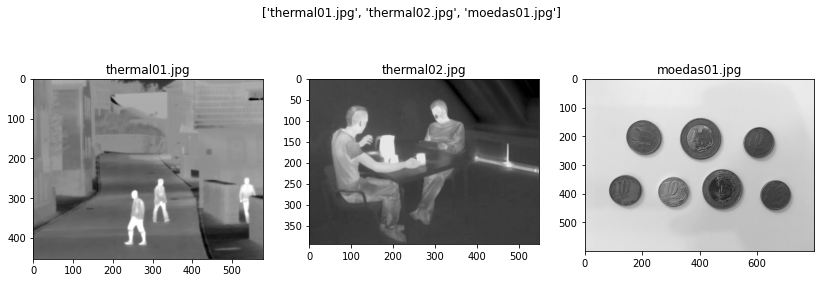

In [13]:
# mostrando as imagens em níveis de cinza.
imgsArray = [img1_gray, img2_gray, img3_gray]
titlesArray = ['thermal01.jpg', 'thermal02.jpg', 'moedas01.jpg']
showMultipleImages(imgsArray, titlesArray, (14, 10), 3, 1)

### **Definindo as funções para o processo de ``limiarização``**

1.   Item da lista
2.   Item da lista



In [14]:
# função para binarização com limiar aleatório
def thresh_bin(imagem, k):
  k, imagem = cv2.threshold(imagem, k, 255, cv2.THRESH_BINARY)
  return imagem

# função para binarização inversa com limiar aleatorio:
def thresh_bin_inv(imagem, k):
  k, imagem = cv2.threshold(imagem, k, 255, cv2.THRESH_BINARY_INV)
  return imagem

# função para binarização com o método THRESH_TOZERO:
def thresh_tzero(imagem, k):
  k, imagem = cv2.threshold(imagem, k, 255, cv2.THRESH_TOZERO)
  return imagem

# função para binarização com o método THRESH_TOZERO_INV:
def thresh_tzero_inv(imagem, k):
  k, imagem = cv2.threshold(imagem, k, 255, cv2.THRESH_TOZERO_INV)
  return imagem

def thresh_trunc(imagem, k):
  k, imagem = cv2.threshold(imagem, k, 255, cv2.THRESH_TRUNC)
  return imagem

